In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

***Load Dataset***

In [2]:
data=pd.read_csv(r"/content/drive/MyDrive/loan_data.csv")
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


***Displaying first five rows of dataset***

In [3]:
df=data
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


***Preprocessing***

In [4]:
df.isnull().sum()


,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [5]:
df.shape

(45000, 14)

In [6]:
df.size

630000

In [7]:
df.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


***EDA***



In [10]:
import seaborn as sns
import numpy as np

<Axes: xlabel='loan_status', ylabel='count'>

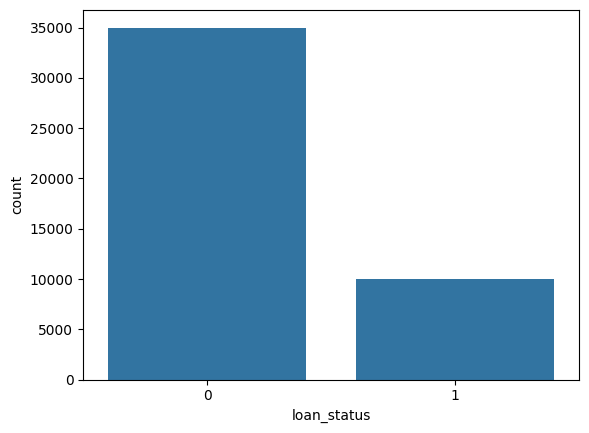

In [11]:
sns.countplot(data=df,x="loan_status")

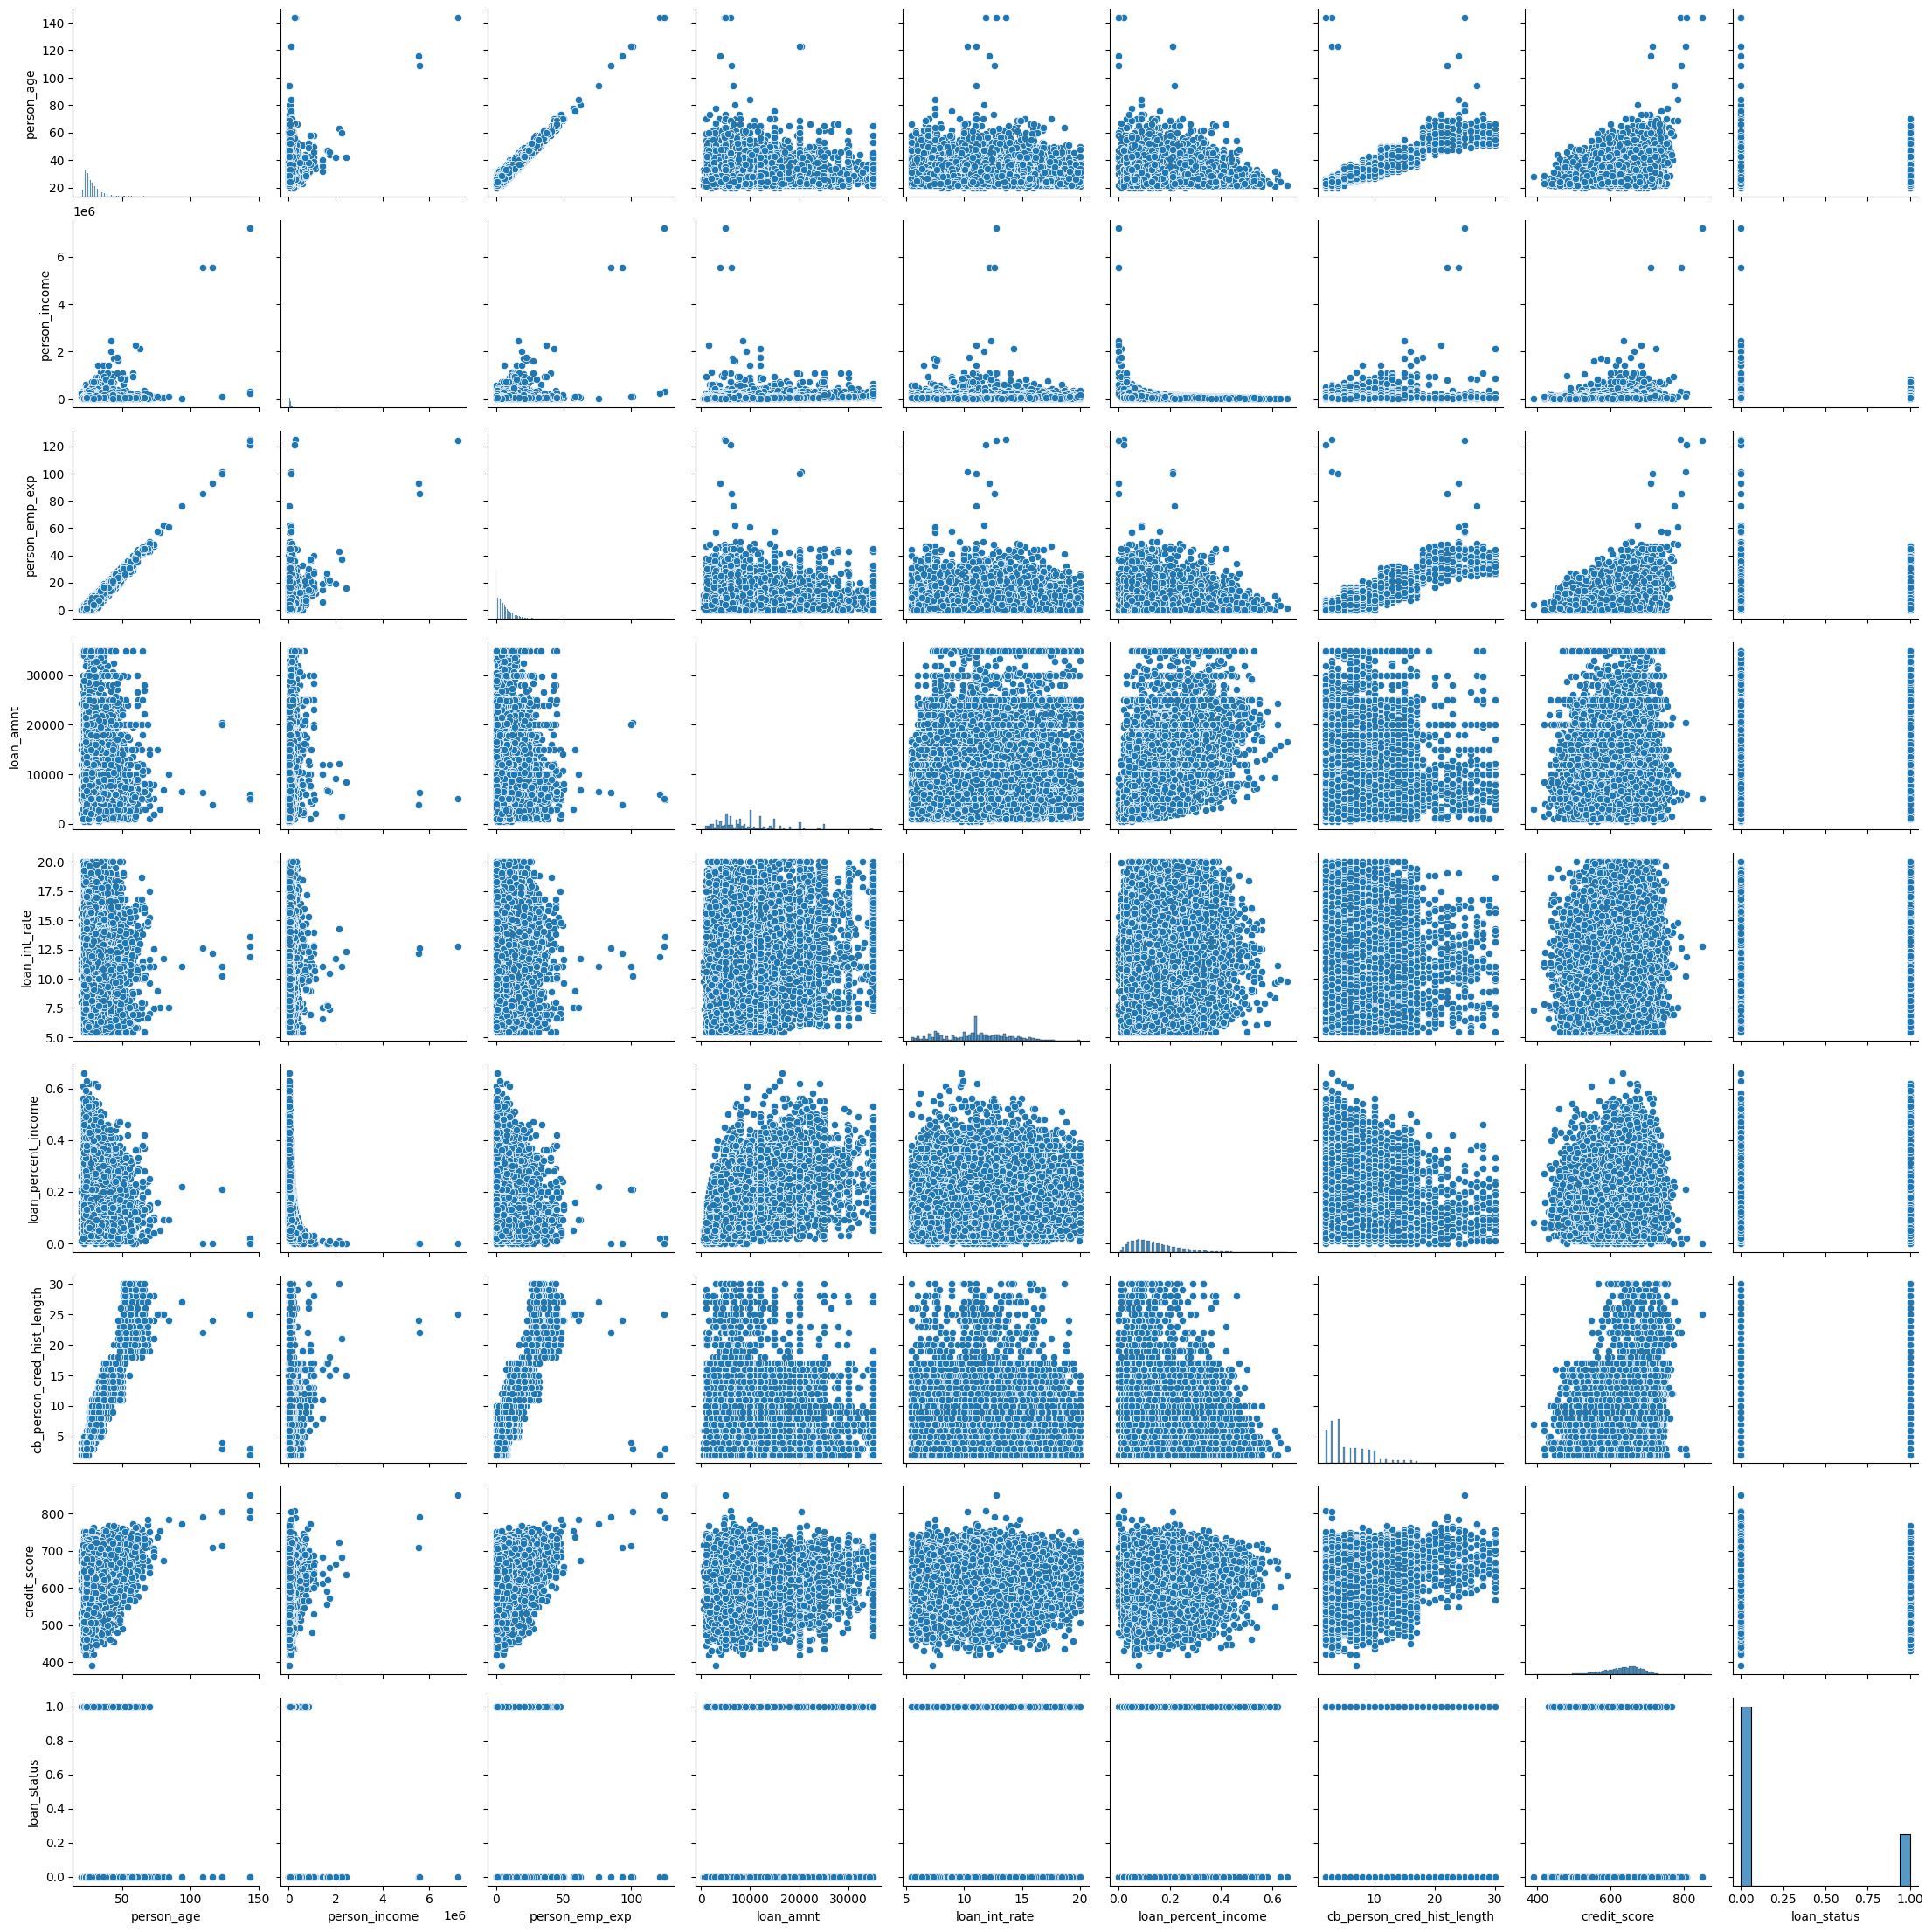

In [12]:
sns.pairplot(df)

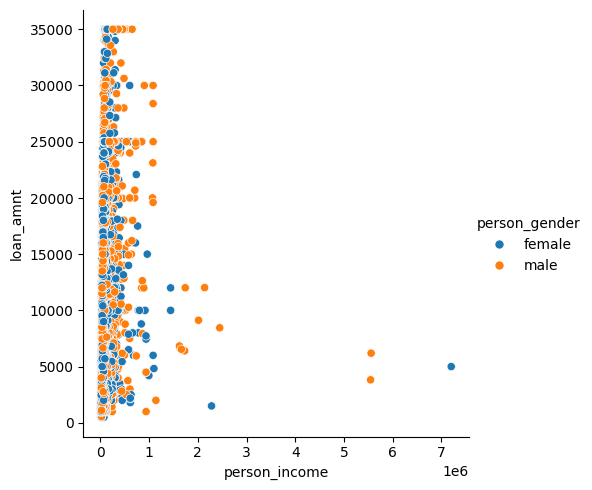

In [13]:
sns.relplot(x="person_income",y="loan_amnt",hue="person_gender",data=df)

<Axes: xlabel='credit_score', ylabel='Density'>

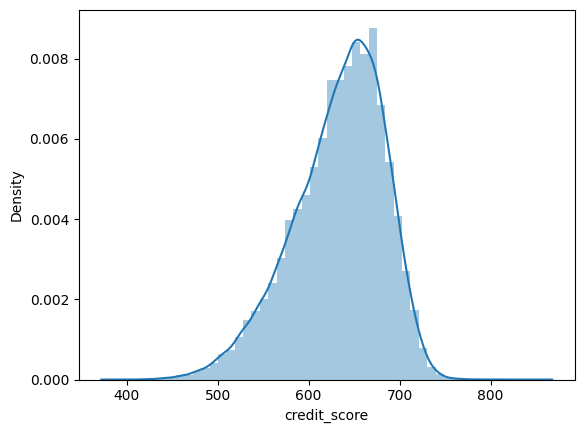

In [14]:
sns.distplot(df["credit_score"])

***Label Encoding***

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
cols=["person_gender","person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file"]
for i in cols:
  df[i]=encoder.fit_transform(df[i])

In [16]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


***Selecting input and output variables***

In [17]:
x=df.drop(["loan_status"],axis=1)
y=df["loan_status"]

In [18]:
x

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0


In [19]:
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


***Count of output values***

In [20]:
df.value_counts("loan_status")

,count
loan_status,
0,35000
1,10000


***Scaling input values***

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

***Balancing the dataset***

In [22]:
from imblearn.over_sampling import SMOTE
#Apply SMOTE
from collections import Counter #counter is to count the occurence of  each class in y-resampled after appling SMOTE
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x_scaled,y)
print("After SMOTE:",Counter(y_resampled))


After SMOTE: Counter({1: 35000, 0: 35000})


***Splitting the dataset into train and test data***

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [24]:
x_train

array([[ 0.76200688, -1.11006918,  0.84919205, ...,  0.19640142,
        -0.19323157, -1.01603973],
       [ 0.43229805,  0.90084476, -0.92385036, ...,  0.7733153 ,
        -0.41085445, -1.01603973],
       [-0.95353824,  0.90084476, -1.17902525, ..., -0.99686317,
        -1.0827486 , -1.01603973],
       ...,
       [-0.12641399,  0.90084476,  1.42301508, ...,  0.29190998,
        -2.12442386, -1.01603973],
       [-0.29183884,  0.90084476,  1.52526448, ..., -0.73910854,
        -0.5672367 , -1.01603973],
       [-0.29183884, -1.11006918,  0.84919205, ..., -0.73910854,
         0.62240616,  0.98421348]])

In [25]:
y_train

,loan_status
47339,1
67456,1
12308,1
32557,0
664,0
...,...
37194,0
6265,0
54886,1
860,1


In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

### **LOGISTIC REGRESSION**

In [27]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
print("Train Accuracy:",lg.score(x_train,y_train))
print("Test Accuracy:",lg.score(x_test,y_test))
y1_pred=lg.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y1_pred))
cm1=confusion_matrix(y_test,y1_pred)
print("Confusion Matrix:\n",cm1)
print("Classification Report:\n",classification_report(y_test,y1_pred))

Train Accuracy: 0.8804107142857143
Test Accuracy: 0.8796428571428572
Accuracy Score: 0.8796428571428572
Confusion Matrix:
 [[5872 1151]
 [ 534 6443]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.87      7023
           1       0.85      0.92      0.88      6977

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



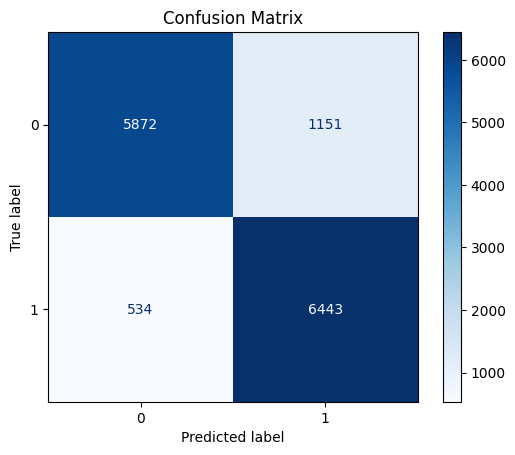

In [28]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### **K NEAREST NEIGHBORS CLASSIFIER**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print("Train Accuracy:",knn.score(x_train,y_train))
print("Test Accuracy:",knn.score(x_test,y_test))
y2_pred=knn.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y2_pred))
cm2=confusion_matrix(y_test,y2_pred)
print("Confusion Matrix:\n",cm2)
print("Classification Report:\n",classification_report(y_test,y2_pred))

Train Accuracy: 0.936875
Test Accuracy: 0.9113571428571429
Accuracy Score: 0.9113571428571429
Confusion Matrix:
 [[5940 1083]
 [ 158 6819]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      7023
           1       0.86      0.98      0.92      6977

    accuracy                           0.91     14000
   macro avg       0.92      0.91      0.91     14000
weighted avg       0.92      0.91      0.91     14000



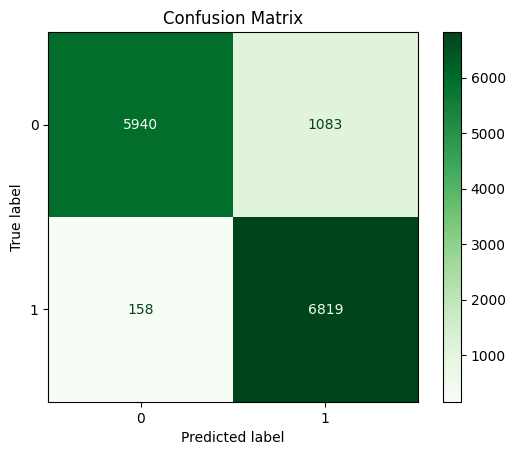

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

### **DECISION TREE CLASSIFIER**

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Train Accuracy:",dt.score(x_train,y_train))
print("Test Accuracy:",dt.score(x_test,y_test))
y3_pred=dt.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y3_pred))
cm3=confusion_matrix(y_test,y3_pred)
print("Confusion Matrix:\n",cm3)
print("Classification Report:\n",classification_report(y_test,y3_pred))



Train Accuracy: 1.0
Test Accuracy: 0.9147142857142857
Accuracy Score: 0.9147142857142857
Confusion Matrix:
 [[6417  606]
 [ 588 6389]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      7023
           1       0.91      0.92      0.91      6977

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



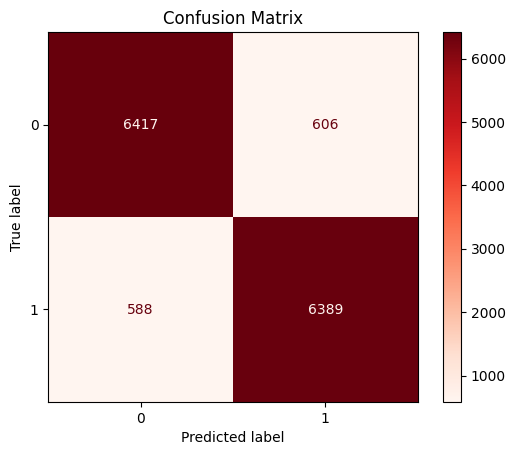

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

### **RANDOM FOREST CLASSIFIER**

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=47,random_state=34)
rfc.fit(x_train,y_train)
print("Train Accuracy:",rfc.score(x_train,y_train))
print("Test Accuracy:",rfc.score(x_test,y_test))
y4_pred=rfc.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y4_pred))
cm4=confusion_matrix(y_test,y4_pred)
print("Confusion Matrix:\n",cm4)
print("Classification Report:\n",classification_report(y_test,y4_pred))




Train Accuracy: 1.0
Test Accuracy: 0.9459285714285715
Accuracy Score: 0.9459285714285715
Confusion Matrix:
 [[6544  479]
 [ 278 6699]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      7023
           1       0.93      0.96      0.95      6977

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



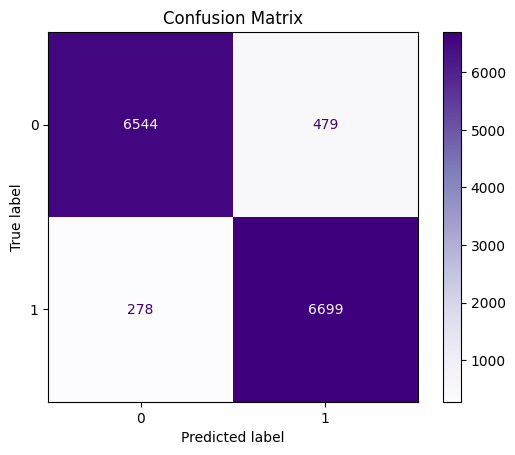

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.show()

### **ADABOOST CLASSIFIER**

In [37]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
print("Train Accuracy:",abc.score(x_train,y_train))
print("Test Accuracy:",abc.score(x_test,y_test))
y5_pred=abc.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y5_pred))
cm5=confusion_matrix(y_test,y5_pred)
print("Confusion Matrix:\n",cm5)
print("Classification Report:\n",classification_report(y_test,y5_pred))



Train Accuracy: 0.8845178571428571
Test Accuracy: 0.8856428571428572
Accuracy Score: 0.8856428571428572
Confusion Matrix:
 [[6083  940]
 [ 661 6316]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      7023
           1       0.87      0.91      0.89      6977

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



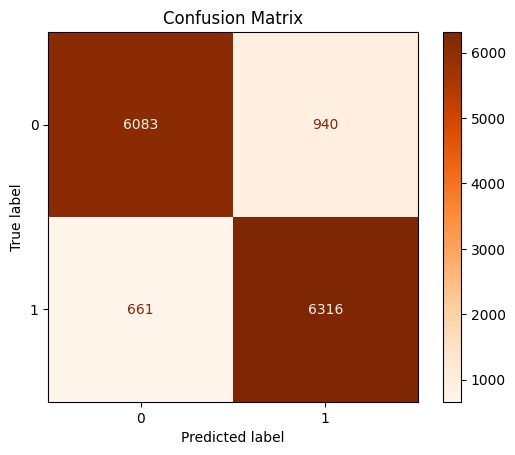

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm5)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix")
plt.show()

### **GRADIENT BOOSTING CLASSIFIER**

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
print("Train Accuracy:",gbc.score(x_train,y_train))
print("Test Accuracy:",gbc.score(x_test,y_test))
y6_pred=gbc.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y6_pred))
cm6=confusion_matrix(y_test,y6_pred)
print("Confusion Matrix:\n",cm6)
print("Classification Report:\n",classification_report(y_test,y6_pred))




Train Accuracy: 0.926125
Test Accuracy: 0.922
Accuracy Score: 0.922
Confusion Matrix:
 [[6362  661]
 [ 431 6546]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      7023
           1       0.91      0.94      0.92      6977

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



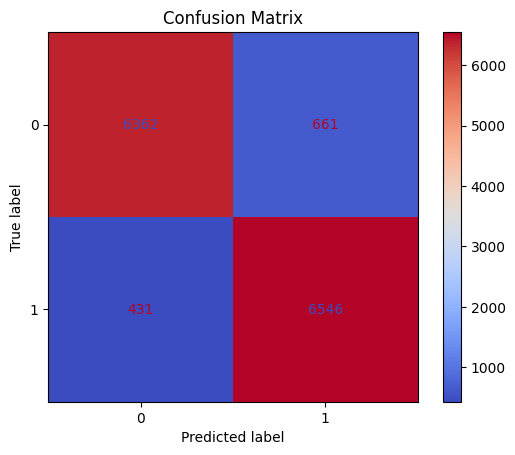

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm6)
disp.plot(cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()

### **SUPPORT VECTOR CLASSIFIER**

In [41]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
print("Train Accuracy:",svc.score(x_train,y_train))
print("Test Accuracy:",svc.score(x_test,y_test))
y7_pred=svc.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y7_pred))
cm7=confusion_matrix(y_test,y7_pred)
print("Confusion Matrix:\n",cm7)
print("Classification Report:\n",classification_report(y_test,y7_pred))



Train Accuracy: 0.9017142857142857
Test Accuracy: 0.8958571428571429
Accuracy Score: 0.8958571428571429
Confusion Matrix:
 [[5969 1054]
 [ 404 6573]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      7023
           1       0.86      0.94      0.90      6977

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



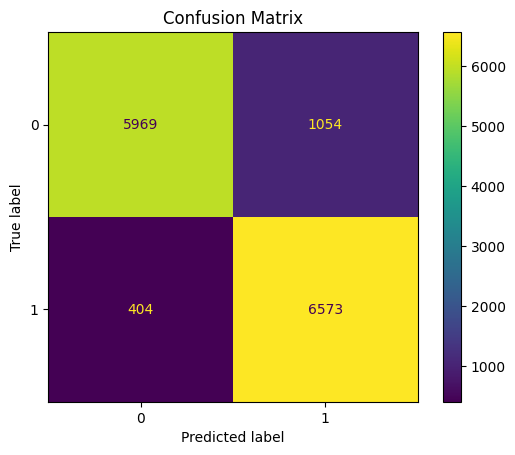

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm7)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

### **GAUSSIAN NAIVE BAYES CLASSIFIER**

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print("Train Accuracy:",gnb.score(x_train,y_train))
print("Test Accuracy:",gnb.score(x_test,y_test))
y8_pred=gnb.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y8_pred))
cm8=confusion_matrix(y_test,y8_pred)
print("Confusion Matrix:\n",cm8)
print("Classification Report:\n",classification_report(y_test,y8_pred))




Train Accuracy: 0.8264285714285714
Test Accuracy: 0.8284285714285714
Accuracy Score: 0.8284285714285714
Confusion Matrix:
 [[4650 2373]
 [  29 6948]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79      7023
           1       0.75      1.00      0.85      6977

    accuracy                           0.83     14000
   macro avg       0.87      0.83      0.82     14000
weighted avg       0.87      0.83      0.82     14000



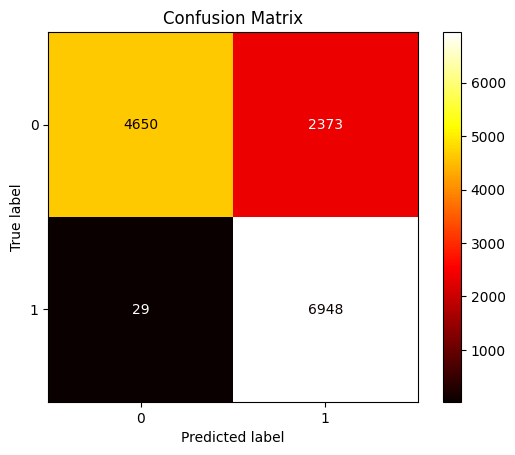

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm8)
disp.plot(cmap='hot')
plt.title("Confusion Matrix")
plt.show()

*Model and their Accuracy*

In [44]:
from prettytable import PrettyTable

table = PrettyTable(["Model", "Accuracy"])
table.add_row(["Logistic Regression", 0.879])
table.add_row(["K Nearest Neighbors Classifier", 0.911])
table.add_row(["Decision Tree Classifier", 0.914])
table.add_row(["Random Forest Classifier", 0.945])
table.add_row(["AdaBoost Classifier", 0.885])
table.add_row(["GradientBoosting Classifier", 0.922])
table.add_row(["Support Vector Classifier", 0.895])
table.add_row(["Gaussian Naive Bayes Classifier", 0.828])

print(table)

+---------------------------------+----------+
|              Model              | Accuracy |
+---------------------------------+----------+
|       Logistic Regression       |  0.879   |
|  K Nearest Neighbors Classifier |  0.911   |
|     Decision Tree Classifier    |  0.914   |
|     Random Forest Classifier    |  0.945   |
|       AdaBoost Classifier       |  0.885   |
|   GradientBoosting Classifier   |  0.922   |
|    Support Vector Classifier    |  0.895   |
| Gaussian Naive Bayes Classifier |  0.828   |
+---------------------------------+----------+


*Graphical Representation*

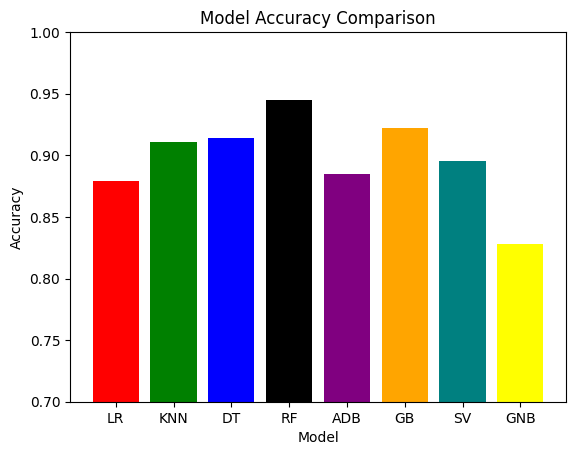

In [45]:
import matplotlib.pyplot as plt

models = ['LR', 'KNN', 'DT', 'RF', 'ADB',"GB","SV","GNB"]
accuracy = [0.879, 0.911, 0.914, 0.945, 0.885,0.922,0.895,0.828]
c=["red","green","blue","black","purple","orange","teal","yellow"]

plt.bar(models, accuracy, color=c)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.show()

## **Hyperparameter Tuning**

In [46]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

### **LOGISTIC REGRESSION**

In [47]:
rs1=RandomizedSearchCV(LogisticRegression(),{
    'C': np.logspace(-3, 3, 20),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'l1_ratio': [0.1, 0.5, 0.9]
},cv=5,n_iter=20,random_state=42,n_jobs=-1)
rs1.fit(x_train,y_train)
print("Best Parameters:",rs1.best_params_)
print("Best Score:",rs1.best_score_)

Best Parameters: {'penalty': 'l2', 'l1_ratio': 0.5, 'C': np.float64(1000.0)}
Best Score: 0.8801249999999999


In [ ]:
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   random_state=42)

In [48]:
lgt=LogisticRegression(penalty='l2',l1_ratio= 0.5,C=np.float64(1000.0))
lgt.fit(x_train,y_train)
print("Train Accuracy:",lgt.score(x_train,y_train))
print("Test Accuracy:",lgt.score(x_test,y_test))
y1t_pred=lgt.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y1t_pred))
cm1t=confusion_matrix(y_test,y1t_pred)
print("Confusion Matrix:\n",cm1t)
print("Classification Report:\n",classification_report(y_test,y1t_pred))


Train Accuracy: 0.8805
Test Accuracy: 0.8797857142857143
Accuracy Score: 0.8797857142857143
Confusion Matrix:
 [[5873 1150]
 [ 533 6444]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.87      7023
           1       0.85      0.92      0.88      6977

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



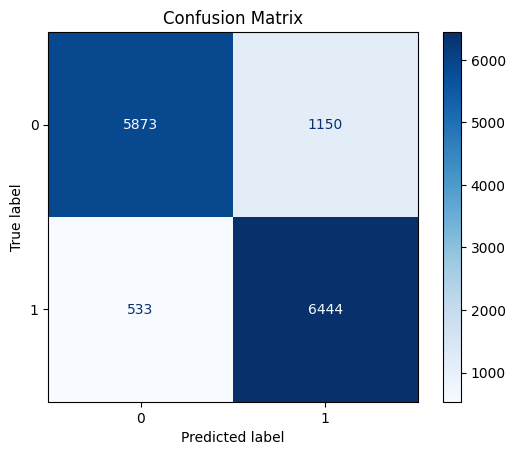

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1t)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### **K NEAREST NEIGHBORS CLASSIFIER**

In [50]:
rs2=RandomizedSearchCV(KNeighborsClassifier(),{
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
},cv=5,n_jobs=-1)
rs2.fit(x_train,y_train)
print("Best Parameters:",rs2.best_params_)
print("Best Score:",rs2.best_score_)

Best Parameters: {'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan'}
Best Score: 0.9360357142857143


In [51]:
knnt=KNeighborsClassifier(weights='distance',n_neighbors=2,metric= 'manhattan')
knnt.fit(x_train,y_train)
print("Train Accuracy:",knnt.score(x_train,y_train))
print("Test Accuracy:",knnt.score(x_test,y_test))
y2t_pred=knnt.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y2t_pred))
cm2t=confusion_matrix(y_test,y2t_pred)
print("Confusion Matrix:\n",cm2t)
print("Classification Report:\n",classification_report(y_test,y2t_pred))


Train Accuracy: 1.0
Test Accuracy: 0.9430714285714286
Accuracy Score: 0.9430714285714286
Confusion Matrix:
 [[6310  713]
 [  84 6893]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      7023
           1       0.91      0.99      0.95      6977

    accuracy                           0.94     14000
   macro avg       0.95      0.94      0.94     14000
weighted avg       0.95      0.94      0.94     14000



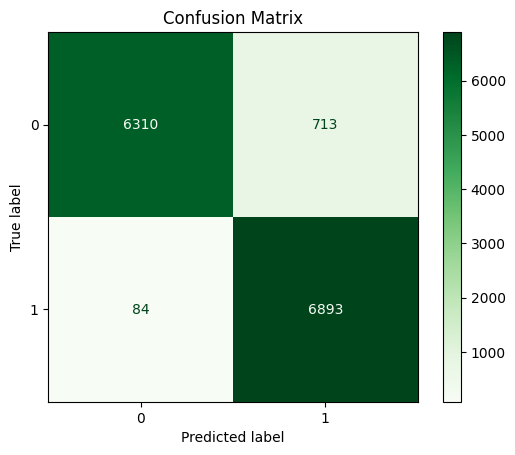

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2t)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

### **DECISION TREE CLASSIFIER**

In [53]:
rs3=RandomizedSearchCV(DecisionTreeClassifier(),
{'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
},n_iter=20,cv=5,n_jobs=-1,verbose=1,random_state=42)
rs3.fit(x_train,y_train)
print("Best Parameters:",rs3.best_params_)
print("Best Score:",rs3.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Best Score: 0.9108214285714287


In [54]:
dtt=DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=None,criterion='gini')
dtt.fit(x_train,y_train)
print("Train Accuracy:",dtt.score(x_train,y_train))
print("Test Accuracy:",dtt.score(x_test,y_test))
y3t_pred=dtt.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y3t_pred))
cm3t=confusion_matrix(y_test,y3t_pred)
print("Confusion Matrix:\n",cm3t)
print("Classification Report:\n",classification_report(y_test,y3t_pred))




Train Accuracy: 1.0
Test Accuracy: 0.9143571428571429
Accuracy Score: 0.9143571428571429
Confusion Matrix:
 [[6420  603]
 [ 596 6381]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      7023
           1       0.91      0.91      0.91      6977

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



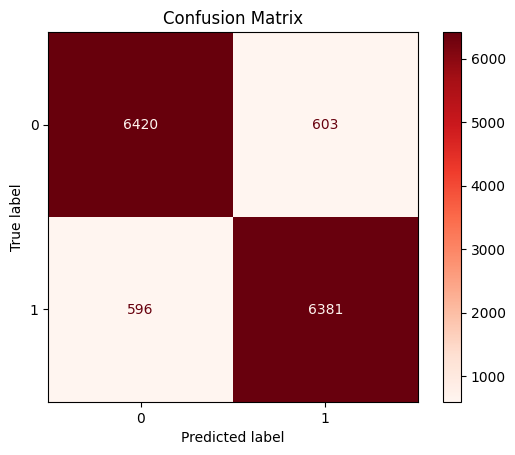

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm3t)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

### **RANDOM FOREST CLASSIFIER**

In [57]:
gs4=GridSearchCV(RandomForestClassifier(),{
'max_depth':['None',10,20,30],'max_features':['auto','sqrt','log2']
},cv=5)
gs4.fit(x_train,y_train)
print("Best Parameters:",gs4.best_params_)
print("Best Score:",gs4.best_score_)

Best Parameters: {'max_depth': 30, 'max_features': 'log2'}
Best Score: 0.9483571428571429


In [58]:
rfct=RandomForestClassifier(max_depth=30,max_features='log2')
rfct.fit(x_train,y_train)
print("Train Accuracy:",rfct.score(x_train,y_train))
print("Test Accuracy:",rfct.score(x_test,y_test))
y4t_pred=rfct.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y4t_pred))
cm4t=confusion_matrix(y_test,y4t_pred)
print("Confusion Matrix:\n",cm4t)
print("Classification Report:\n",classification_report(y_test,y4t_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9477857142857142
Accuracy Score: 0.9477857142857142
Confusion Matrix:
 [[6567  456]
 [ 275 6702]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7023
           1       0.94      0.96      0.95      6977

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



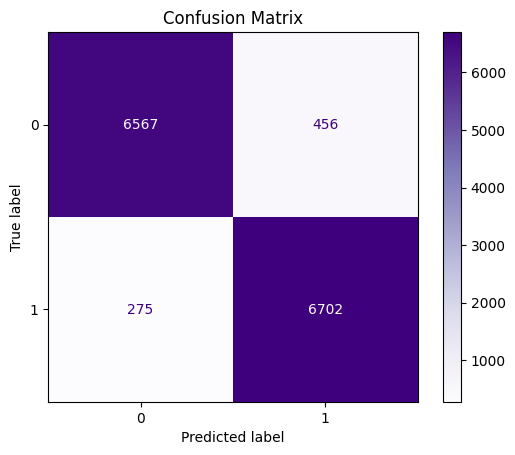

In [59]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm4t)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.show()

### **ADABOOST CLASSIFIER**

In [61]:
gs5=GridSearchCV(AdaBoostClassifier(),{
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01,0.1,1.0],

},cv=5)
gs5.fit(x_train,y_train)
print("Best Parameters:",gs5.best_params_)
print("Best Score:",gs5.best_score_)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 150}
Best Score: 0.9051607142857142


In [62]:
abct=AdaBoostClassifier(learning_rate=1.0,n_estimators=150)
abct.fit(x_train,y_train)
print("Train Accuracy:",abct.score(x_train,y_train))
print("Test Accuracy:",abct.score(x_test,y_test))
y5t_pred=abct.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y5t_pred))
cm5t=confusion_matrix(y_test,y5t_pred)
print("Confusion Matrix:\n",cm5t)
print("Classification Report:\n",classification_report(y_test,y5t_pred))

Train Accuracy: 0.9062678571428572
Test Accuracy: 0.9045
Accuracy Score: 0.9045
Confusion Matrix:
 [[6218  805]
 [ 532 6445]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      7023
           1       0.89      0.92      0.91      6977

    accuracy                           0.90     14000
   macro avg       0.91      0.90      0.90     14000
weighted avg       0.91      0.90      0.90     14000



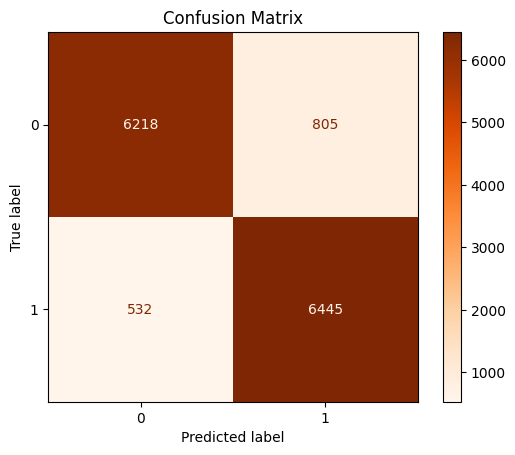

In [63]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm5t)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix")
plt.show()

### **GRADIENT BOOSTING CLASSIFIER**

In [64]:
rs6=RandomizedSearchCV(GradientBoostingClassifier(),{
    'n_estimators':[50,100,200],'max_depth':[3,4,5]
},cv=5,n_iter=20,n_jobs=-1,verbose=2,random_state=42)
rs6.fit(x_train,y_train)
print("Best Parameters:",rs6.best_params_)
print("Best Score:",rs6.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'n_estimators': 200, 'max_depth': 5}
Best Score: 0.9510535714285714


In [65]:
gbct=GradientBoostingClassifier(n_estimators=200,max_depth=5)
gbct.fit(x_train,y_train)
print("Train Accuracy:",gbct.score(x_train,y_train))
print("Test Accuracy:",gbct.score(x_test,y_test))
y6t_pred=gbct.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y6t_pred))
cm6t=confusion_matrix(y_test,y6t_pred)
print("Confusion Matrix:\n",cm6t)
print("Classification Report:\n",classification_report(y_test,y6t_pred))


Train Accuracy: 0.961375
Test Accuracy: 0.9501428571428572
Accuracy Score: 0.9501428571428572
Confusion Matrix:
 [[6716  307]
 [ 391 6586]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7023
           1       0.96      0.94      0.95      6977

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



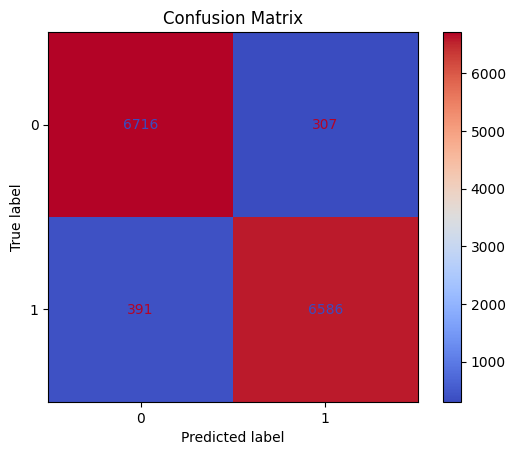

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm6t)
disp.plot(cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()


### **SUPPORT VECTOR CLASSIFIER**

In [67]:
gs7=GridSearchCV(SVC(),{
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'degree': [2, 3, 4]
},cv=3,n_jobs=-1,verbose=2)

Since hyper parameter tuning failed even after waiting for almost 3 hrs i randomly took some parameters and trained.The accuracy raised a little from 0.89 to 0.90

In [68]:
svct=SVC(C=10,kernel='rbf',gamma='scale')
svct.fit(x_train,y_train)
print("Train Accuracy:",svct.score(x_train,y_train))
print("Test Accuracy:",svct.score(x_test,y_test))
y7t_pred=svct.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y7t_pred))
cm7t=confusion_matrix(y_test,y7t_pred)
print("Confusion Matrix:\n",cm7t)
print("Classification Report:\n",classification_report(y_test,y7t_pred))


Train Accuracy: 0.9182321428571428
Test Accuracy: 0.9068571428571428
Accuracy Score: 0.9068571428571428
Confusion Matrix:
 [[6095  928]
 [ 376 6601]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      7023
           1       0.88      0.95      0.91      6977

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



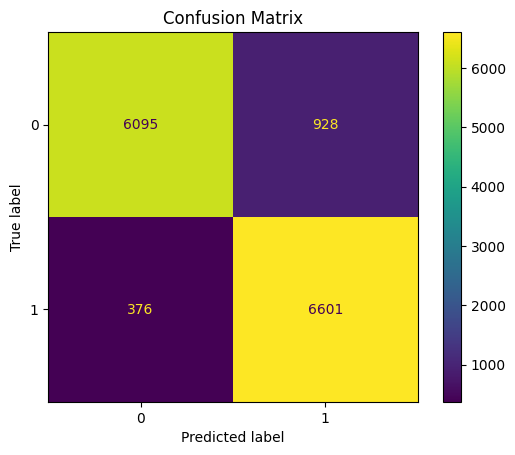

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm7t)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

### **GAUSSIAN NAIVE BAYES CLASSIFIER**

In [70]:
gs8=GridSearchCV(GaussianNB(),{
    "var_smoothing": np.logspace(0, -9, num=100)
},cv=5)
gs8.fit(x_train,y_train)
print("Best Parameters:",gs8.best_params_)
print("Best Score:",gs8.best_score_)

Best Parameters: {'var_smoothing': np.float64(0.43287612810830584)}
Best Score: 0.8541607142857142


In [73]:
gnbt=GaussianNB(var_smoothing=np.float64(0.43287612810830584))
gnbt.fit(x_train,y_train)
print("Train Accuracy:",gnbt.score(x_train,y_train))
print("Test Accuracy:",gnbt.score(x_test,y_test))
y8t_pred=gnbt.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y8t_pred))
cm8t=confusion_matrix(y_test,y8t_pred)
print("Confusion Matrix:\n",cm8t)
print("Classification Report:\n",classification_report(y_test,y8t_pred))




Train Accuracy: 0.8543928571428572
Test Accuracy: 0.8539285714285715
Accuracy Score: 0.8539285714285715
Confusion Matrix:
 [[5300 1723]
 [ 322 6655]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.84      7023
           1       0.79      0.95      0.87      6977

    accuracy                           0.85     14000
   macro avg       0.87      0.85      0.85     14000
weighted avg       0.87      0.85      0.85     14000



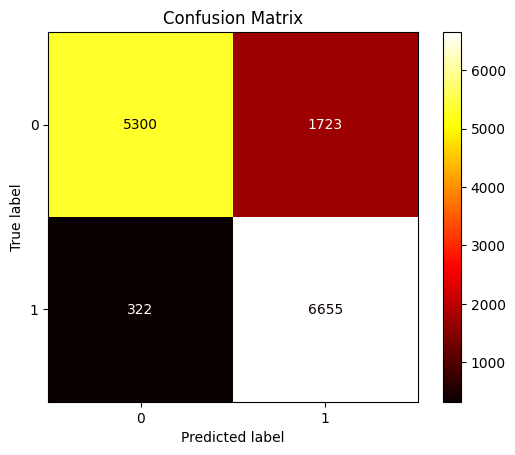

In [74]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm8t)
disp.plot(cmap="hot")
plt.title("Confusion Matrix")
plt.show()

*Models and their accuracies after hyper parameter tuning*

In [75]:
from prettytable import PrettyTable

table = PrettyTable(["Model", "Accuracy"])
table.add_row(["Logistic Regression", 0.879])
table.add_row(["KNeighbors Classifier", 0.943])
table.add_row(["Decision Tree Classifier", 0.914])
table.add_row(["Random Forest Classifier", 0.947])
table.add_row(["AdaBoost Classifier", 0.904])
table.add_row(["GradientBoosting Classifier", 0.950])
table.add_row(["Support Vector Classifier", 0.906])
table.add_row(["Gaussian Naive Bayes Classifier", 0.853])

print(table)

+---------------------------------+----------+
|              Model              | Accuracy |
+---------------------------------+----------+
|       Logistic Regression       |  0.879   |
|      KNeighbors Classifier      |  0.943   |
|     Decision Tree Classifier    |  0.914   |
|     Random Forest Classifier    |  0.947   |
|       AdaBoost Classifier       |  0.904   |
|   GradientBoosting Classifier   |   0.95   |
|    Support Vector Classifier    |  0.906   |
| Gaussian Naive Bayes Classifier |  0.853   |
+---------------------------------+----------+


*Graphical Representation*

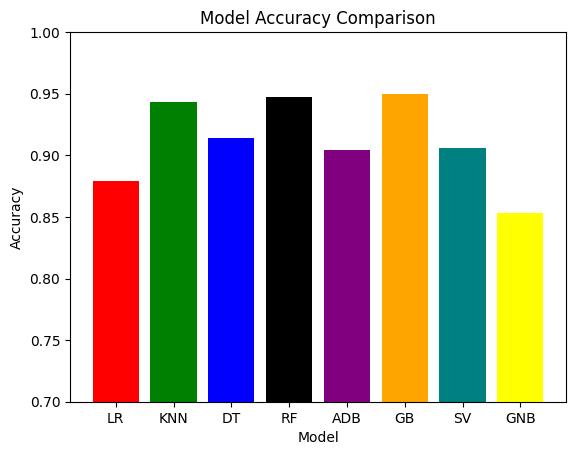

In [76]:
import matplotlib.pyplot as plt

models = ['LR', 'KNN', 'DT', 'RF', 'ADB',"GB","SV","GNB"]
accuracy = [0.879, 0.943, 0.914, 0.947, 0.904,0.950,0.906,0.853]
c=["red","green","blue","black","purple","orange","teal","yellow"]

plt.bar(models, accuracy, color=c)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.show()

*Accuracy before and after hyperparameter tuning*

In [77]:
from prettytable import PrettyTable

table = PrettyTable(["Model", "Accuracy","Accuracy after Hyperparameter tuning"])
table.add_row(["Logistic Regression", 0.879,0.879])
table.add_row(["KNeighbors Classifier", 0.911,0.943])
table.add_row(["Decision Tree Classifier", 0.914,0.914])
table.add_row(["Random Forest Classifier", 0.945,0.947])
table.add_row(["AdaBoost Classifier", 0.885,0.904])
table.add_row(["GradientBoosting Classifier", 0.922,0.950])
table.add_row(["Gaussian Naive Bayes Classifier", 0.828,0.853])

print(table)

+---------------------------------+----------+--------------------------------------+
|              Model              | Accuracy | Accuracy after Hyperparameter tuning |
+---------------------------------+----------+--------------------------------------+
|       Logistic Regression       |  0.879   |                0.879                 |
|      KNeighbors Classifier      |  0.911   |                0.943                 |
|     Decision Tree Classifier    |  0.914   |                0.914                 |
|     Random Forest Classifier    |  0.945   |                0.947                 |
|       AdaBoost Classifier       |  0.885   |                0.904                 |
|   GradientBoosting Classifier   |  0.922   |                 0.95                 |
| Gaussian Naive Bayes Classifier |  0.828   |                0.853                 |
+---------------------------------+----------+--------------------------------------+


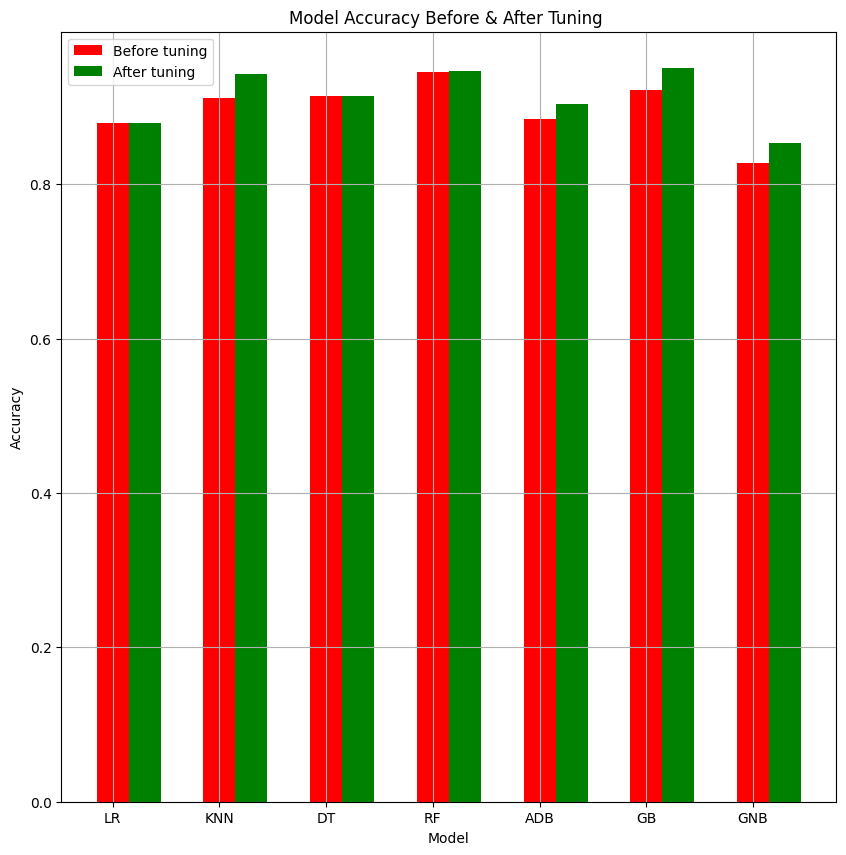

In [87]:
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
xval=["LR","KNN","DT","RF","ADB","GB","GNB"]
x_range=np.arange(len(xval))
width=0.3
y_val1=[0.879,0.911,0.914,0.945,0.885,0.922,0.828]
plt.bar(x_range,y_val1,width=width,label="Before tuning",color="red")


y_val2=[0.879,0.943,0.914,0.947,0.904,0.950,0.853]
plt.bar(x_range+width,y_val2,width=width,label="After tuning",color="green")

plt.xticks(ticks=x_range,labels=xval)
plt.grid(True)
plt.title("Model Accuracy Before & After Tuning ")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend()
plt.show()